**Adding Libraries**

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Uploading Data-NB**

In [44]:
dataset = pd.read_excel('Data-NB.xlsx')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

**Encoding The values in X**

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

gender_column_index = 3

for i in range(len(X[:, gender_column_index])):
    if X[i, gender_column_index] == 'Male':
        X[i, gender_column_index] = 0
    elif X[i, gender_column_index] == 'Female':
        X[i, gender_column_index] = 1
    elif X[i, gender_column_index] == 'Mle':
        X[i, gender_column_index] = 0
    elif X[i, gender_column_index] == 'Female ':
        X[i, gender_column_index] = 1
    elif X[i, gender_column_index] == 'Male ':
        X[i, gender_column_index] = 0

In [46]:
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])

In [47]:
print(X)

[[13.0 24 66.0 0 0]
 [15.0 24 67.0 1 0]
 [5.25 24 45.0 0 0]
 ...
 [11.75 24 47.0 0 0]
 [0.0 20 0.0 1 1]
 [13.75 24 53.0 0 2]]


In [48]:
le1 = LabelEncoder()
y = le1.fit_transform(y)

In [49]:
print(y)

[0 0 3 5 5 6 6 5 3 3 2 2 3 2 5 1 4 3 3 5 2 6 5 3 3 6 6 4 5 7 4 3 3 4 4 3 4
 6 5 5 5 3 3 3 4 6 3 7 3 5 5 7 3 5 2 5 3 5 5 7 5 2 2 5 2 3 4 4 3 5 5 3 1 2
 3 3 5 5 3 5 5 4 3 4 5 4 2 4 1 5 4 3 3 5 3 6 3 5 2 3 3 5 5 7 0 5 4 0 4 2 2
 5 3 5 5 3 2 5 5 4 7 5 2 3 5 3 6 3 4 5 4 3 4 1 5 5 5 3 2 5 5 6 5 5 4 3 3 3
 3 2 5 3 6 2 3 6 5 2 3 2 4 2 5 3 4 2 3 4 3 3 4 2 3 5 1 0 3 0 1 2 3 0 1 5 0
 3 5 0 1 1 3 0 2 2 5 0 3 5 3 5 4 3 1 4 2 4 0 3 0 4 5 3 6 2 5 3 2 3 1 3 3 5
 3 2 3 7 2 1 3 3 2 3 1 6 3 1 2 3 2 3 3 0 0 5 0 3 1 3 2 4 0 3 1 6 2 3 2 4 5
 3 4 1 1 5 6 3 4 4 5 3 3 4 2 2 0 3 3 3 4 6 2 3 2 5 3 2 0 3 0 5 2 1 4 1 0 2
 2 3 4 1 5 2 5 0 4 5 0 2 2 1 2 5 3 1 3 3 3 1 4 2 1 0 2 3 0 1 3 2 3 5 0 2 5
 0 2 1 5 3 1 0 3 3 7 2 2 1 3 5 4 2 2 3 2 3 4 3 6 3 4 4 1 2 1 3 3 6 2 1 7 2
 5 4 3 3 0 4 5 0 3 5 3 3 2 4 3 3 2 5 1 5 4 4 2 2 0 1 3 5 4 0 3 3 4 3 3 3 6
 3 4 1 1 3 4 2 4 2 4 3 3 2 4 0 4 3 3 0 4 3 4 2 3 3 0 5 4 4 3 4 5 5 5 3 4 2
 5 6 2 2 2 4 4 4 4 5 2 5 2 5 3 2 2 3 5 2 3 6 4 2 2 2 3 7 4 2 2 5 3 3 3 3 3
 6 2 4 3 2 1 1 5 2 5 1 2 

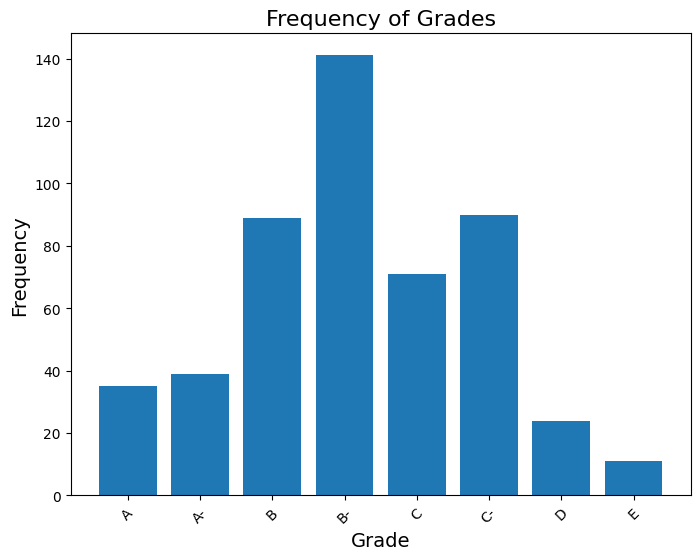

In [50]:
data = pd.read_excel('Data-NB.xlsx')

# Get the unique grade values and their counts
grades, counts = np.unique(data['Grade'], return_counts=True)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(grades, counts)

# Customize the plot
plt.title('Frequency of Grades', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Splitting the dataset into the Training set and Test set**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Naive Bayes model on the Training set**

In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

**Training the Random Forest Classification model on the Training set**

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier_tree = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_tree.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Training the RBT Classification model on the Training set**

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=10, random_state=0)

**Making the Confusion Matrix for Naive Bayes**

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0  0  0  0  0  0]
 [ 1  3  2  0  0  0  0  0]
 [ 0  2 16  2  0  0  0  0]
 [ 0  0  2 20  4  0  0  0]
 [ 0  0  0  6  5  1  1  0]
 [ 0  0  0  0  2 16  0  0]
 [ 0  0  0  0  0  1  5  0]
 [ 0  0  0  0  0  0  0  1]]


0.76

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.60      0.50      0.55         6
           2       0.80      0.80      0.80        20
           3       0.71      0.77      0.74        26
           4       0.45      0.38      0.42        13
           5       0.89      0.89      0.89        18
           6       0.83      0.83      0.83         6
           7       1.00      1.00      1.00         1

    accuracy                           0.76       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.75      0.76      0.75       100



**Making the Confusion Matrix for Random Forest**

In [58]:
y_pred = classifier_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 9  0  1  0  0  0  0  0]
 [ 1  4  1  0  0  0  0  0]
 [ 0  0 19  1  0  0  0  0]
 [ 0  0  1 23  2  0  0  0]
 [ 0  0  0  1  9  3  0  0]
 [ 0  0  0  0  2 16  0  0]
 [ 0  0  0  0  0  4  1  1]
 [ 0  0  0  0  0  0  0  1]]


0.82

**Making the Confusion Matrix for Random Forest**

In [59]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 9  1  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  2 22  2  0  0  0]
 [ 0  0  0  0  9  4  0  0]
 [ 0  0  0  0  2 16  0  0]
 [ 0  0  0  0  0  1  5  0]
 [ 0  0  0  0  0  0  0  1]]


0.88

**Visualize Correlation Matrix**

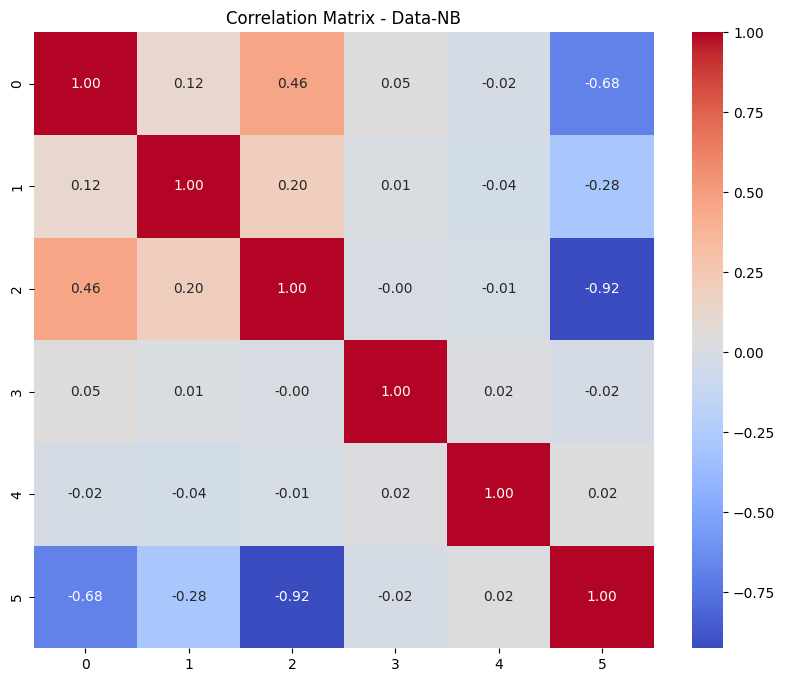

In [60]:
# Combine X and y into a single variable dataset
dataset = np.concatenate((X, y.reshape(-1, 1)), axis=1)

# Convert back to DataFrame
dataset = pd.DataFrame(dataset)

# Calculate correlation matrix
correlation_matrix_df1 = dataset.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Data-NB')
plt.show()

**Uploading IRIS**

In [61]:
dataset=pd.read_csv('iris.csv')
dataset.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Class']
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

le3 = LabelEncoder()
y = le2.fit_transform(y)

In [62]:
dataset.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**Splitting the dataset into the Training set and Test set**

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Naive Bayes model on the Training set**

In [65]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

**Training the Random Forest Classification on the Training set**



In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier_tree = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_tree.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Training the RBT model on the Training set**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=10, random_state=0)

**Making the Confusion Matrix for Naive Bayes**

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


0.9

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.77      1.00      0.87        10
           2       1.00      0.62      0.77         8

    accuracy                           0.90        30
   macro avg       0.92      0.88      0.88        30
weighted avg       0.92      0.90      0.89        30



**Heat Map for classification**

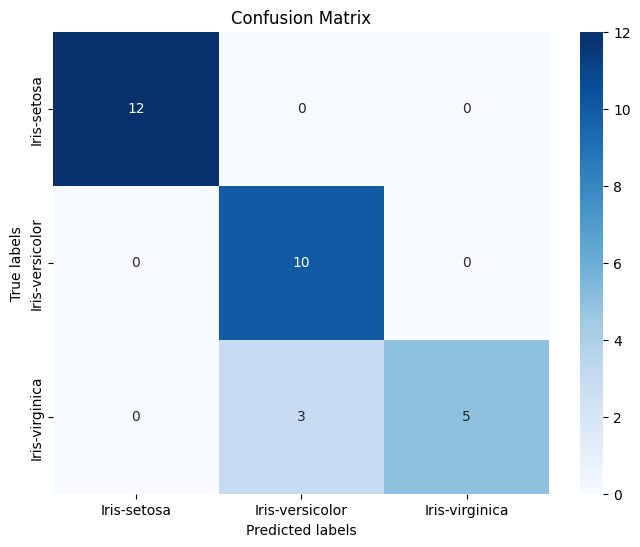

In [70]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=le2.classes_, yticklabels=le2.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Making the Confusion Matrix for Random Forest**

In [71]:
y_pred = classifier_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


0.9

**Making the Confusion Matrix for RBT**

In [72]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


0.9

**Visualize Correlation Matrix**

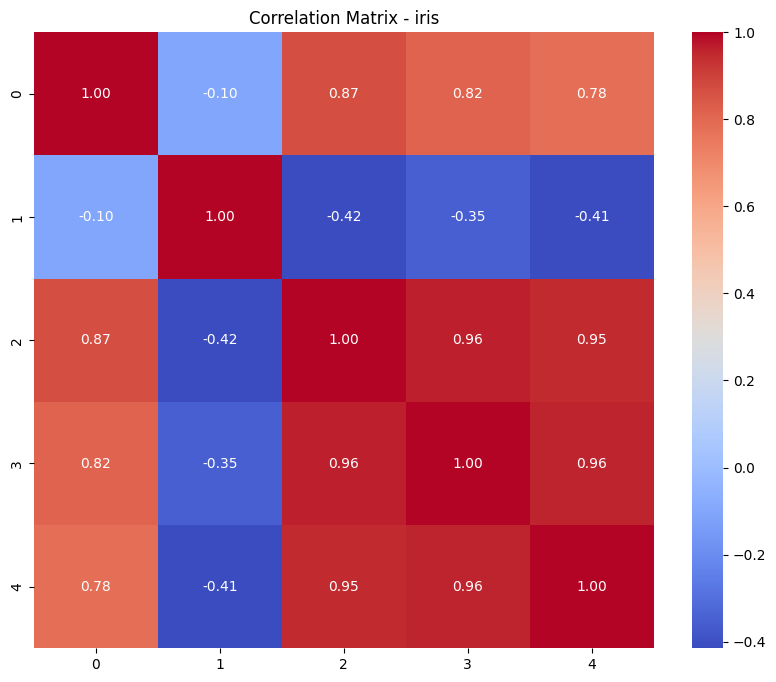

In [73]:
# Encode categorical target variable y

# Combine X and y into a single variable dataset
dataset_encoded = np.concatenate((X, y.reshape(-1, 1)), axis=1)

# Convert back to DataFrame
dataset_encoded = pd.DataFrame(dataset_encoded)

# Calculate correlation matrix
correlation_matrix_encoded = dataset_encoded.corr()
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - iris')
plt.show()

**Showing The image**

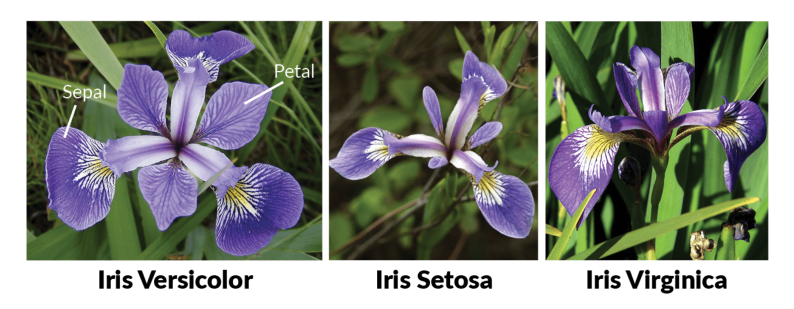

In [74]:
import urllib.request
from PIL import Image

# URL of the image
image_url = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"

# Open the URL and convert to PIL Image
url_response = urllib.request.urlopen(image_url)
pil_image = Image.open(url_response)

# Create a larger figure
plt.figure(figsize=(10, 8))

# Display the image
plt.imshow(pil_image)
plt.axis('off')  # Hide axes
plt.show()


**Reason Behind difference in observed Performance**

1. Gradient Boosted Trees and Random Forest are both ensemble methods that can handle complex relationships in the data. They are capable of capturing non-linear relationships and interactions between features, which might not be captured well by Naïve Bayes. Naïve Bayes, on the other hand, makes a strong assumption of feature independence, which might not hold true in many real-world scenarios.

2. Gradient Boosted Trees and Random Forest are less sensitive to feature scaling since they operate by recursively partitioning the feature space. Naïve Bayes, however, computes probabilities based on feature values and can be affected by differences in feature scales, leading to suboptimal performance if feature scaling is not performed beforehand.

3. Gradient Boosted Trees and Random Forest tend to be more robust to noisy data and outliers compared to Naïve Bayes. This is because they use ensemble techniques that aggregate predictions from multiple trees, reducing the impact of individual noisy data points. Naïve Bayes, on the other hand, relies on probability calculations based on feature distributions and can be influenced by outliers.
